# Exploratory Data Analysis EDA

---
It contain the folowing dayasets:
- **CTA** : (`clean_sample_consum_total_agregat.parquet`)
- **RCA** : (`clean_sample_repte_consums_anomals.parquet`)
- **FEC** : (`clean_sample_fuites_experiencia_client.parquet`)
- **ICI** : (`clean_sample_incidencies_comptadors_intelligents.parquet`)

In [9]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)   

Load data

In [10]:
fp_CTA = '../data/clean_sample_consum_total_agregat.parquet'
fp_RCA = '../data/clean_sample_repte_consums_anomals.parquet'
fp_FEC='../data/clean_sample_fuites_experiencia_client.parquet'
fp_ICI='../data/clean_sample_incidencies_comptadors_intelligents.parquet'

from src.data_preprocessing import load_parquet_to_df
df_CTA = load_parquet_to_df(fp_CTA)
df_RCA = load_parquet_to_df(fp_RCA)
df_FEC = load_parquet_to_df(fp_FEC)
df_ICI = load_parquet_to_df(fp_ICI)


['POLIZA_SUMINISTRO', 'FECHA', 'CONSUMO_REAL', 'SECCIO_CENSAL', 'US_AIGUA_GEST', 'NUM_MUN_SGAB', 'NUM_DTE_MUNI', 'NUM_COMPLET', 'DATA_INST_COMP', 'MARCA_COMP', 'CODI_MODEL', 'DIAM_COMP']
['POLISSA_SUBM', 'CODI_ANOMALIA', 'START_DATE', 'END_DATE', 'US_AIGUA_SUBM', 'SECCIO_CENSAL', 'NUMEROSERIECONTADOR', 'CONSUMO_REAL', 'FECHA_HORA']
['POLISSA_SUBM', 'DATA_INI_FACT', 'DATA_FIN_FACT', 'CREATED_MENSAJE', 'CODIGO_MENSAJE', 'TIPO_MENSAJE', 'US_AIGUA_SUBM', 'SECCIO_CENSAL', 'NUMEROSERIECONTADOR', 'CONSUMO_REAL', 'FECHA_HORA']
['POLIZA_SUMINISTRO', 'FECHA', 'CONSUMO_REAL', 'SECCIO_CENSAL', 'US_AIGUA_GEST', 'NUM_MUN_SGAB', 'NUM_DTE_MUNI', 'NUM_COMPLET', 'DATA_INST_COMP', 'MARCA_COMP', 'CODI_MODEL', 'DIAM_COMP']


Dimensions of the datasets

In [11]:
dfs= {'CTA':df_CTA,'RCA':df_RCA,'FEC':df_FEC,'ICI':df_ICI,}

for i,df in dfs.items():
    print(f"{i}: {df.shape[0]} rows, {df.shape[1]} columns")

CTA: 1048563 rows, 12 columns
RCA: 1048576 rows, 9 columns
FEC: 1048576 rows, 11 columns
ICI: 1048563 rows, 12 columns


Before starting, we notice that ICI and CTA files were quite alike, after some calulations, we concluded that they are the same file.

In [31]:
df_CTA.shape == df_ICI.shape
list(df_CTA.columns) == list(df_ICI.columns)
df_CTA.equals(df_ICI)

True

Functions useful

In [15]:
def description(df,name):
    print(f"=== {name} dataset ===")
    display(df.head())
    print("--- Info ---")
    print(df.info())
    print("--- Missing values ---")
    print(df.isna().mean().sort_values(ascending=False).head(10))
    print("--- Describe ---")
    display(df.describe())

def missing_values(df,name):
    sns.heatmap(df.isna(),cbar=False)
    plt.title(f"Missing values heatmap: {name}")
    plt.show()

def distribution(df,cols,name):
    df[cols].hist(bins=30,figsize=(12,6),edgecolor='black')
    plt.title(f"Distribution of the numeric columns of {name}")
    plt.show()


CTA

=== CTA dataset ===


,POLIZA_SUMINISTRO,FECHA,CONSUMO_REAL,SECCIO_CENSAL,US_AIGUA_GEST,NUM_MUN_SGAB,NUM_DTE_MUNI,NUM_COMPLET,DATA_INST_COMP,MARCA_COMP,CODI_MODEL,DIAM_COMP
0,VECWAVDUULZDSBOP,2021-01-01,1758,801903025.0,C,0.0,3.0,N5ER4KUNPNXOQQCE,2016-04-25,5557SZ47QZAZ56EQ,23.0,30.0
1,VECWAVDUULZDSBOP,2021-01-02,1854,801903025.0,C,0.0,3.0,N5ER4KUNPNXOQQCE,2016-04-25,5557SZ47QZAZ56EQ,23.0,30.0
2,VECWAVDUULZDSBOP,2021-01-03,1885,801903025.0,C,0.0,3.0,N5ER4KUNPNXOQQCE,2016-04-25,5557SZ47QZAZ56EQ,23.0,30.0
3,VECWAVDUULZDSBOP,2021-01-04,5676,801903025.0,C,0.0,3.0,N5ER4KUNPNXOQQCE,2016-04-25,5557SZ47QZAZ56EQ,23.0,30.0
4,VECWAVDUULZDSBOP,2021-01-05,4456,801903025.0,C,0.0,3.0,N5ER4KUNPNXOQQCE,2016-04-25,5557SZ47QZAZ56EQ,23.0,30.0


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048563 entries, 0 to 1048562
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   POLIZA_SUMINISTRO  1048563 non-null  object        
 1   FECHA              1048563 non-null  datetime64[ns]
 2   CONSUMO_REAL       1048563 non-null  int64         
 3   SECCIO_CENSAL      1048563 non-null  float64       
 4   US_AIGUA_GEST      1048563 non-null  object        
 5   NUM_MUN_SGAB       1048563 non-null  float64       
 6   NUM_DTE_MUNI       1048563 non-null  float64       
 7   NUM_COMPLET        1048563 non-null  object        
 8   DATA_INST_COMP     1048563 non-null  datetime64[ns]
 9   MARCA_COMP         1048563 non-null  object        
 10  CODI_MODEL         1048563 non-null  float64       
 11  DIAM_COMP          1048563 non-null  float64       
dtypes: datetime64[ns](2), float64(5), int64(1), object(4)
memory usage: 96.

,FECHA,CONSUMO_REAL,SECCIO_CENSAL,NUM_MUN_SGAB,NUM_DTE_MUNI,DATA_INST_COMP,CODI_MODEL,DIAM_COMP
count,1048563,1.048563e+06,1.048563e+06,1.048563e+06,1.048563e+06,1048563,1.048563e+06,1.048563e+06
mean,2022-12-31 05:56:28.091703040,2.427395e+02,8.101557e+08,9.930662e+00,5.715349e+00,2016-12-17 17:36:30.882951168,2.949653e+01,1.517338e+01
min,2021-01-01 00:00:00,0.000000e+00,8.019010e+08,0.000000e+00,1.000000e+00,2014-09-22 00:00:00,2.000000e+00,1.500000e+01
25%,2021-12-30 00:00:00,1.020000e+02,8.101060e+08,1.000000e+01,6.000000e+00,2016-10-14 00:00:00,3.100000e+01,1.500000e+01
50%,2023-01-01 00:00:00,1.930000e+02,8.101060e+08,1.000000e+01,6.000000e+00,2017-03-16 00:00:00,3.100000e+01,1.500000e+01
75%,2023-12-30 00:00:00,3.100000e+02,8.101060e+08,1.000000e+01,6.000000e+00,2017-03-31 00:00:00,3.100000e+01,1.500000e+01
max,2024-12-31 00:00:00,8.213500e+04,8.301020e+08,2.500000e+01,6.000000e+00,2020-06-29 00:00:00,7.300000e+01,3.000000e+01
std,NaN,4.189674e+02,2.722208e+06,2.427002e+00,9.589655e-01,NaN,7.936561e+00,1.581531e+00


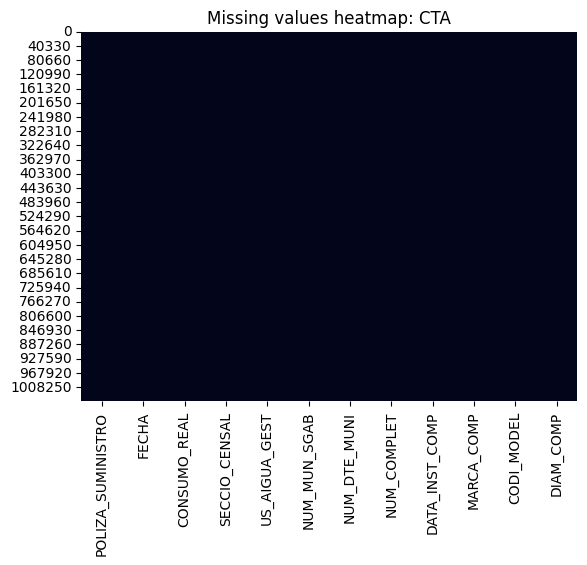

In [32]:
description(df_CTA,'CTA')
missing_values(df_CTA,'CTA')


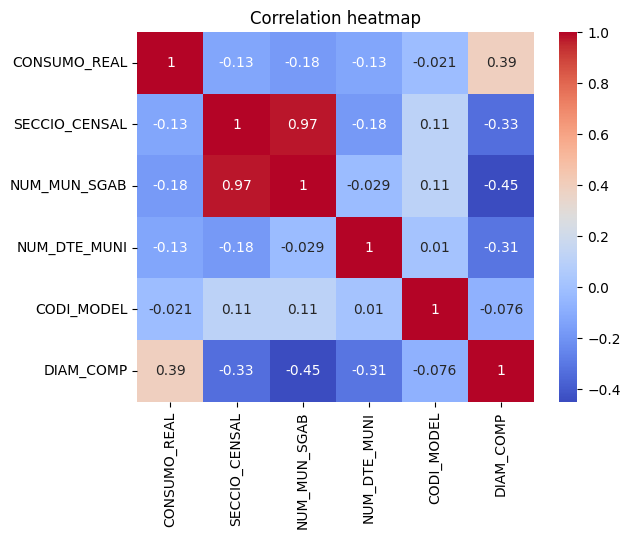

In [33]:
sns.heatmap(df_CTA.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title("Correlation heatmap")
plt.show()

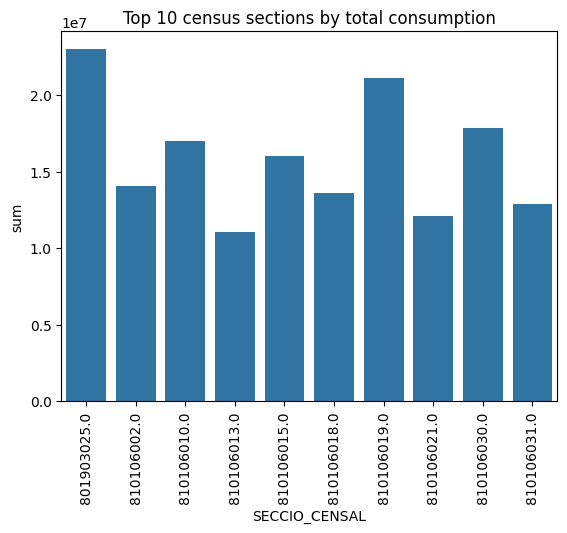

In [36]:
cta_census=df_CTA.groupby('SECCIO_CENSAL')['CONSUMO_REAL'].agg(['mean','sum','count']).reset_index()
cta_census.sort_values('sum',ascending=False)

top_census=cta_census.nlargest(10,'sum')
sns.barplot(x='SECCIO_CENSAL',y='sum',data=top_census)
plt.xticks(rotation=90)
plt.title('Top 10 census sections by total consumption')

plt.show()

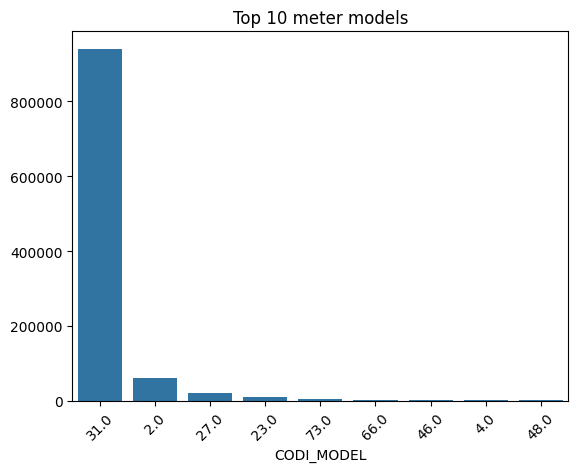

In [38]:
model_count= df_CTA['CODI_MODEL'].value_counts().head(10)
sns.barplot(x=model_count.index.astype(str),y=model_count.values)
plt.title('Top 10 meter models')
plt.xticks(rotation=45)
plt.show()

RCA

=== RCA dataset ===


,POLISSA_SUBM,CODI_ANOMALIA,START_DATE,END_DATE,US_AIGUA_SUBM,SECCIO_CENSAL,NUMEROSERIECONTADOR,CONSUMO_REAL,FECHA_HORA
0,TZSHLTAPLXX4OYI3,163840,2024-07-08,2024-09-05,DOMÈSTIC,0805601006,P22FA037836K,NaN,2024-01-01
1,FJ2I5K246X6SG3T4,163840,2023-01-26,2023-03-27,DOMÈSTIC,0805602004,P21VA155772I,NaN,2024-01-01
2,MPIXKKMZKJXANKKB,163840,2024-05-07,2024-07-05,DOMÈSTIC,0801507024,I20LA206734D,NaN,2024-01-01
3,LV6FI7TE7BX7NKKE,163840,2023-01-11,2023-03-13,DOMÈSTIC,0820002005,I19LA121835K,NaN,2024-01-01
4,RSSOFEQOC53RL6OD,2,2023-01-16,2023-03-16,DOMÈSTIC,0801906059,P15VA076725J,NaN,2024-01-01


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   POLISSA_SUBM         1048576 non-null  object        
 1   CODI_ANOMALIA        1048576 non-null  int64         
 2   START_DATE           1048576 non-null  datetime64[ns]
 3   END_DATE             1048576 non-null  datetime64[ns]
 4   US_AIGUA_SUBM        1048576 non-null  object        
 5   SECCIO_CENSAL        1031448 non-null  object        
 6   NUMEROSERIECONTADOR  1048576 non-null  object        
 7   CONSUMO_REAL         754464 non-null   float64       
 8   FECHA_HORA           1048576 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(1), object(4)
memory usage: 72.0+ MB
None
--- Missing values ---
CONSUMO_REAL           0.280487
SECCIO_CENSAL          0.016335
POLISSA_SUBM           0.000000
CODI_ANOMALIA       

,CODI_ANOMALIA,START_DATE,END_DATE,CONSUMO_REAL,FECHA_HORA
count,1.048576e+06,1048576,1048576,754464.000000,1048576
mean,2.115221e+05,2023-08-08 17:58:22.770995968,2023-10-13 12:20:26.486206208,13.411554,2024-01-31 14:18:16.352679424
min,2.000000e+00,2022-10-31 00:00:00,2023-01-02 00:00:00,-24426.000000,2024-01-01 00:00:00
25%,3.276800e+04,2023-02-28 00:00:00,2023-05-04 00:00:00,0.000000,2024-01-16 10:13:59
50%,1.638400e+05,2023-07-05 00:00:00,2023-09-05 00:00:00,0.000000,2024-01-31 16:00:38.500000
75%,1.638400e+05,2024-01-08 00:00:00,2024-03-15 00:00:00,7.000000,2024-02-15 19:00:00
max,1.052800e+06,2024-10-31 00:00:00,2024-12-31 00:00:00,85310.000000,2024-03-01 19:22:18
std,3.076289e+05,NaN,NaN,199.249441,NaN


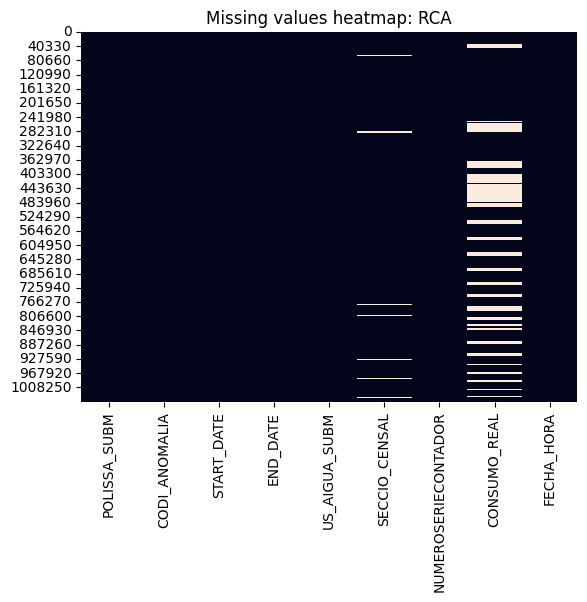

In [40]:
description(df_RCA,'RCA')
missing_values(df_RCA,'RCA')


Text(0.5, 1.0, 'Top 10 anomalies codes')

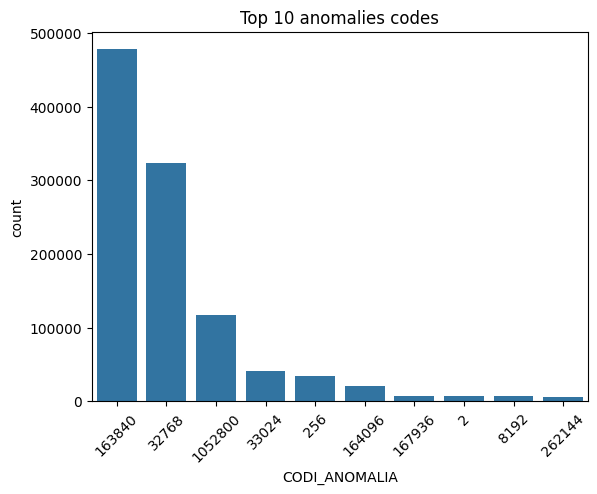

In [41]:
sns.countplot(x='CODI_ANOMALIA',data=df_RCA,order=df_RCA['CODI_ANOMALIA'].value_counts().index[:10])
plt.xticks(rotation=45)
plt.title("Top 10 anomalies codes")

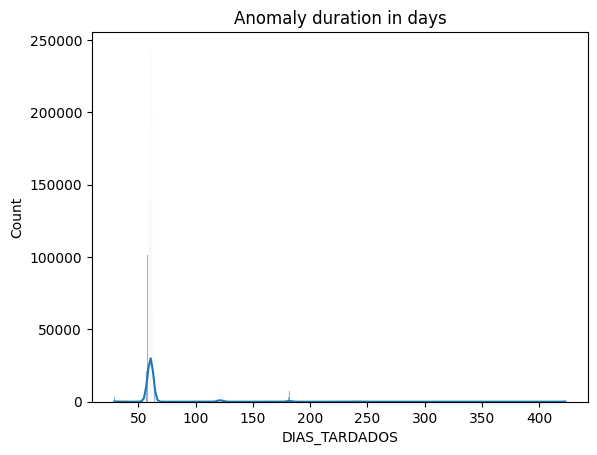

In [45]:
df_RCA['DIAS_TARDADOS']= (df_RCA['END_DATE']-df_RCA['START_DATE']).dt.days
df_RCA['DIAS_TARDADOS'].describe()

sns.histplot(df_RCA['DIAS_TARDADOS'],kde=True)
plt.title("Anomaly duration in days")
plt.show()

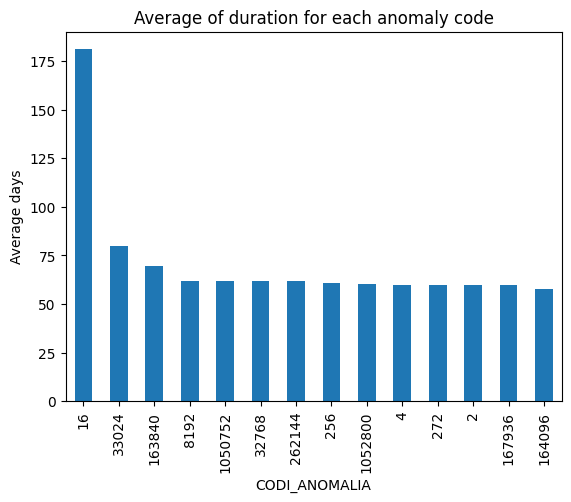

In [46]:
anom_time=df_RCA.groupby('CODI_ANOMALIA')['DIAS_TARDADOS'].mean().sort_values(ascending=False)
anom_time.plot(kind='bar')
plt.title('Average of duration for each anomaly code')
plt.ylabel('Average days')
plt.show()


FEC

=== FEC dataset ===


,POLISSA_SUBM,DATA_INI_FACT,DATA_FIN_FACT,CREATED_MENSAJE,CODIGO_MENSAJE,TIPO_MENSAJE,US_AIGUA_SUBM,SECCIO_CENSAL,NUMEROSERIECONTADOR,CONSUMO_REAL,FECHA_HORA
0,RGYFWIZ4ZRRZKX2K,2023-09-13,2023-11-14,NaT,None,None,DOMÈSTIC,0801907090,IBAJ44VHSIRRTASA,NaN,2024-01-01
1,HHB4U5HUQKW7IOGD,2023-08-13,2023-10-16,NaT,None,None,DOMÈSTIC,0801909040,L2CLPPJRIPAEESV7,NaN,2024-01-01
2,EU6AT3IKPUKCZTBU,2024-01-24,2024-03-26,NaT,None,None,DOMÈSTIC,0801902046,45TBDJQN4LA37ZIN,NaN,2024-01-01
3,EU6AT3IKPUKCZTBU,2023-11-27,2024-01-24,NaT,None,None,DOMÈSTIC,0801902046,45TBDJQN4LA37ZIN,NaN,2024-01-01
4,EWNDTPECBVEGW6AU,2023-09-29,2023-11-27,NaT,None,None,DOMÈSTIC,0801902046,VTRAI3L24SWKVC5H,NaN,2024-01-01


--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 11 columns):
 #   Column               Non-Null Count    Dtype         
---  ------               --------------    -----         
 0   POLISSA_SUBM         1048576 non-null  object        
 1   DATA_INI_FACT        1048576 non-null  datetime64[ns]
 2   DATA_FIN_FACT        1048576 non-null  datetime64[ns]
 3   CREATED_MENSAJE      775129 non-null   datetime64[ns]
 4   CODIGO_MENSAJE       775129 non-null   object        
 5   TIPO_MENSAJE         775129 non-null   object        
 6   US_AIGUA_SUBM        1048576 non-null  object        
 7   SECCIO_CENSAL        1018942 non-null  object        
 8   NUMEROSERIECONTADOR  1048576 non-null  object        
 9   CONSUMO_REAL         898110 non-null   float64       
 10  FECHA_HORA           1048576 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), object(6)
memory usage: 88.0+ MB
None
--- Missing values ---
TIPO_ME

,DATA_INI_FACT,DATA_FIN_FACT,CREATED_MENSAJE,CONSUMO_REAL,FECHA_HORA
count,1048576,1048576,775129,898110.000000,1048576
mean,2023-12-11 05:24:59.606323712,2024-02-07 16:35:34.616089856,2024-02-04 23:55:50.802829824,245.409907,2024-01-08 00:24:37.359192576
min,2023-01-04 00:00:00,2023-03-02 00:00:00,2023-01-04 15:33:56,-2.000000,2024-01-01 00:00:00
25%,2023-07-28 00:00:00,2023-09-13 00:00:00,2023-08-08 15:39:26,0.000000,2024-01-04 12:07:23
50%,2023-12-04 00:00:00,2024-01-30 00:00:00,2023-12-27 15:54:31,13.000000,2024-01-08 00:31:36
75%,2024-04-23 00:00:00,2024-06-21 00:00:00,2024-07-27 15:39:28,67.000000,2024-01-11 12:38:26
max,2024-10-31 00:00:00,2024-12-31 00:00:00,2025-05-27 15:39:33,342388.000000,2024-01-15 00:47:38
std,NaN,NaN,NaN,1854.226354,NaN


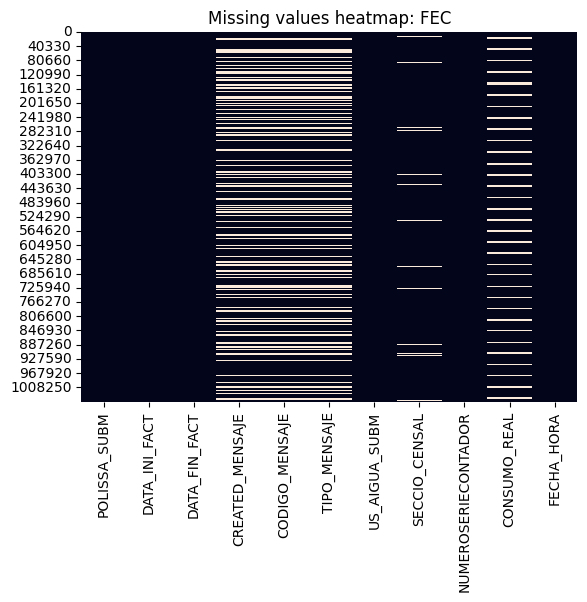

In [47]:
description(df_FEC,'FEC')
missing_values(df_FEC,'FEC')


Text(0.5, 1.0, 'TIPOS DE MENSAJE')

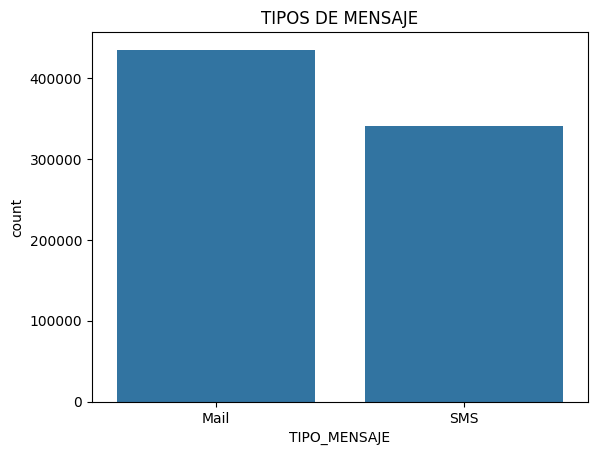

In [48]:
sns.countplot(x='TIPO_MENSAJE',data=df_FEC,order=df_FEC['TIPO_MENSAJE'].value_counts().index[:10])
plt.title("TIPOS DE MENSAJE")

Text(0.5, 1.0, 'Distribution of subministrament types')

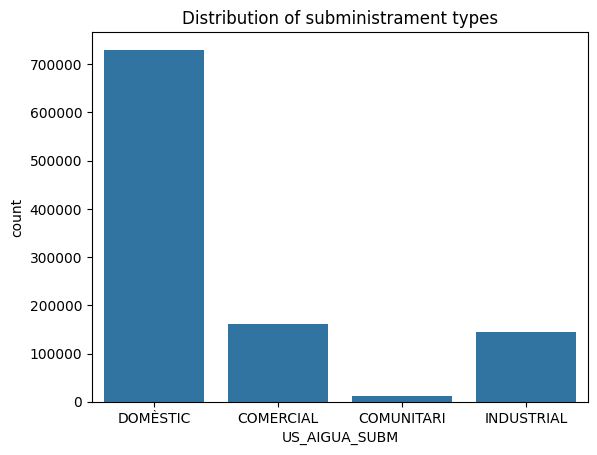

In [50]:
sns.countplot(x='US_AIGUA_SUBM',data=df_FEC)
plt.title("Distribution of subministrament types")

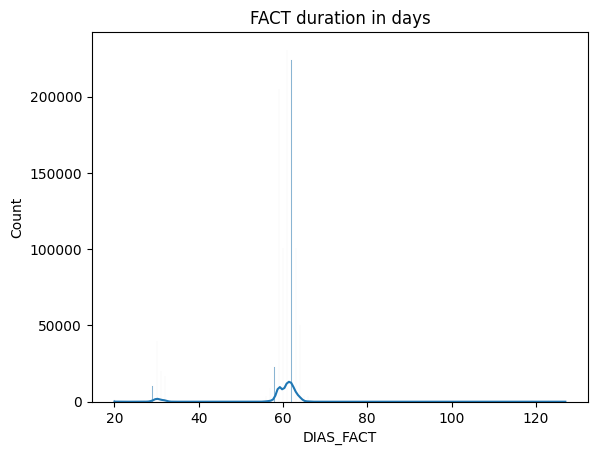

In [52]:
df_FEC['DIAS_FACT']= (df_FEC['DATA_FIN_FACT']-df_FEC['DATA_INI_FACT']).dt.days
df_FEC['DIAS_FACT'].describe()

sns.histplot(df_FEC['DIAS_FACT'],kde=True)
plt.title("FACT duration in days")
plt.show()

,SECCIO_CENSAL,NUM_CONTADORS
225,0801905005,5
222,0801905002,5
121,0801902160,5
126,0801902170,5
491,0801910070,4
408,0801908073,4
86,0801902089,4
262,0801905068,4
77,0801902079,4
342,0801907034,4


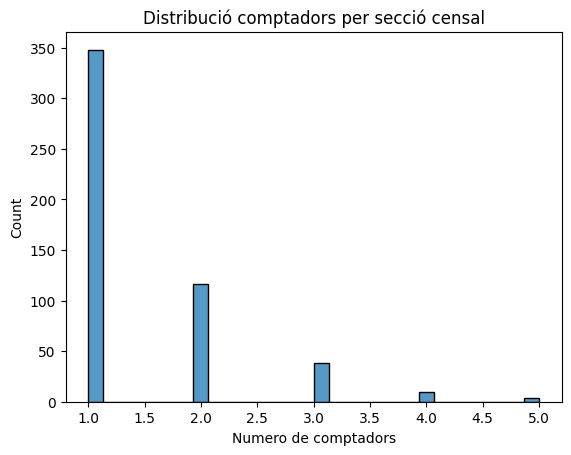

In [58]:
meters_section=(
    df_FEC.groupby('SECCIO_CENSAL')['NUMEROSERIECONTADOR']
    .nunique()
    .reset_index(name='NUM_CONTADORS')
    .sort_values('NUM_CONTADORS',ascending=False)
)

display(meters_section.head(10))

sns.histplot(meters_section['NUM_CONTADORS'],bins=30)
plt.title('Distribució comptadors per secció censal')
plt.xlabel("Numero de comptadors")
plt.show()

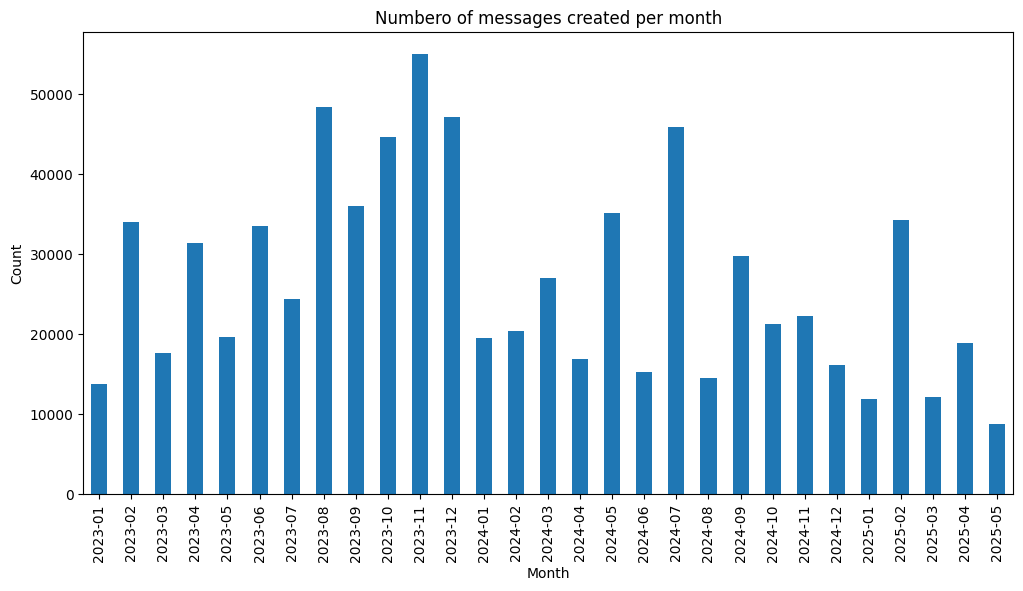

In [63]:
df_FEC['CREATED_MENSAJE'].dt.to_period('M').value_counts().sort_index().plot(kind='bar',figsize=(12,6))
plt.title("Numbero of messages created per month")
plt.ylabel("Count")
plt.xlabel("Month")
plt.show()

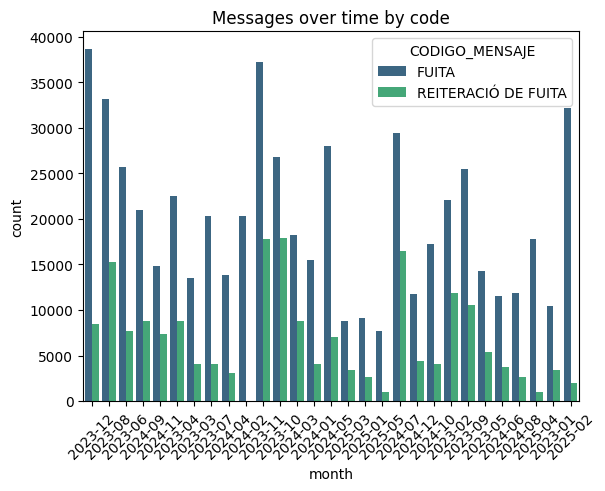

In [65]:
df_FEC['month'] = df_FEC['CREATED_MENSAJE'].dt.to_period('M')
sns.countplot(data=df_FEC, x='month', hue='CODIGO_MENSAJE', palette='viridis')
plt.xticks(rotation=45)
plt.title('Messages over time by code')
plt.show()

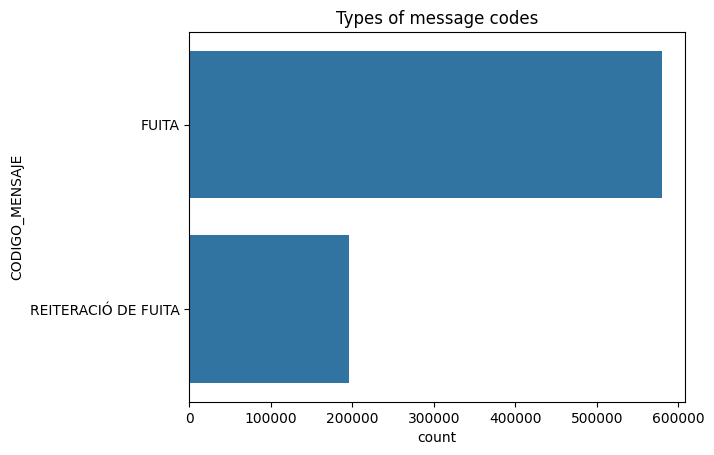

In [61]:
sns.countplot(data=df_FEC,y='CODIGO_MENSAJE',order=df_FEC['CODIGO_MENSAJE'].value_counts().index[:10])
plt.title("Types of message codes")
plt.show()

In [70]:
message_zone=(
    df_FEC.groupby(['SECCIO_CENSAL','CODIGO_MENSAJE'])
    .size().unstack(fill_value=0).reset_index()
)


#estaria bé sumar fuites + reiteracio i veure exactament quines seccions son les que més tenen
message_zone.head()

CODIGO_MENSAJE,SECCIO_CENSAL,FUITA,REITERACIÓ DE FUITA
0,0801901004,1348,674
1,0801901009,4152,0
2,0801901010,674,0
3,0801901011,5389,3365
4,0801901012,4716,2022


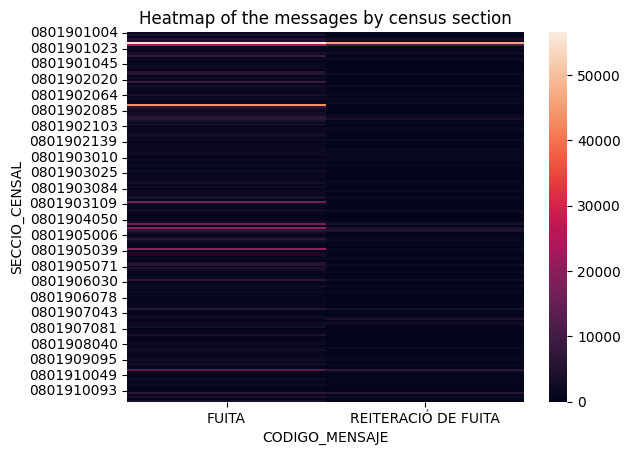

In [68]:
sns.heatmap(message_zone.set_index('SECCIO_CENSAL'))
plt.title("Heatmap of the messages by census section")
plt.show()

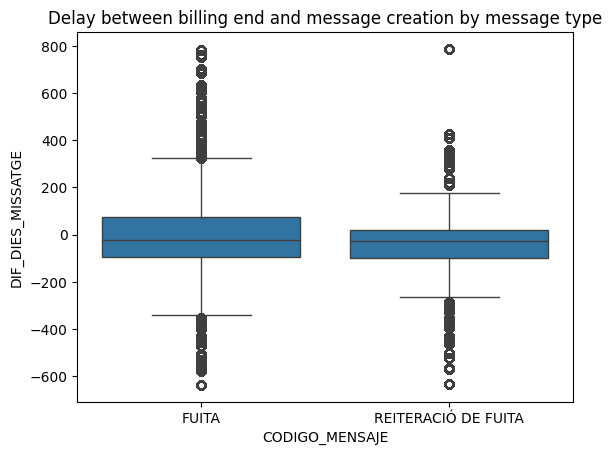

In [ ]:
df_FEC['DIF_DIES_MISSATGE'] = (df_FEC['CREATED_MENSAJE'] - df_FEC['DATA_FIN_FACT']).dt.days
sns.boxplot(data=df_FEC, x='CODIGO_MENSAJE', y='DIF_DIES_MISSATGE')
plt.title('Delay between billing end and message creation')
plt.show()